In [1]:
import os

import pandas as pd

DATA_DIR = 'data/staging/logs/'

In [2]:
df_sesh = pd.read_csv(DATA_DIR + 'vmgr_sessions.csv', names=['date_time','auth'])
df_sesh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  6831 non-null   object
 1   auth       6831 non-null   object
dtypes: object(2)
memory usage: 106.9+ KB


In [3]:
df_sesh['date_time'] = pd.to_datetime(df_sesh['date_time'])
df_sesh['date'] = pd.to_datetime(df_sesh.date_time.dt.date)
df_sesh.head()

,date_time,auth,date
0,2018-12-17 20:14:05,jmancino,2018-12-17
1,2018-12-17 20:34:33,jmancino,2018-12-17
2,2018-12-18 07:30:14,gkeitner,2018-12-18
3,2018-12-18 07:36:23,rsoemedi,2018-12-18
4,2018-12-18 07:37:46,dmurphyd,2018-12-18


In [4]:
df_sesh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  6831 non-null   datetime64[ns]
 1   auth       6831 non-null   object        
 2   date       6831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 160.2+ KB


In [5]:
df_sesh = df_sesh.groupby(['date','auth']).count().reset_index()
df_sesh.head()

,date,auth,date_time
0,2018-12-17,jmancino,2
1,2018-12-18,aayalaph,3
2,2018-12-18,abchambe,1
3,2018-12-18,cbriant,1
4,2018-12-18,dmurphyd,1


In [6]:
df_sesh.rename(columns={'date_time':'logins'}, inplace=True)
df_sesh.set_index('date', drop=True, inplace=True)
df_sesh.head()

,auth,logins
date,,
2018-12-17,jmancino,2
2018-12-18,aayalaph,3
2018-12-18,abchambe,1
2018-12-18,cbriant,1
2018-12-18,dmurphyd,1


In [7]:
df_sesh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4806 entries, 2018-12-17 to 2020-03-02
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   auth    4806 non-null   object
 1   logins  4806 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.6+ KB


In [8]:
df_sesh['unique_logins'] = df_sesh.groupby('date')['auth'].transform('count')
df_sesh['total_logins'] = df_sesh.groupby('date')['logins'].transform('sum')
df_sesh.drop(columns=['auth','logins'], inplace=True)
df_sesh.drop_duplicates(inplace=True)

In [9]:
print("Rows: {}".format(len(df_sesh)))
df_sesh.head()

Rows: 194


,unique_logins,total_logins
date,,
2018-12-17,1,2
2018-12-18,20,30
2018-12-19,12,21
2018-12-20,18,34
2018-12-21,23,32


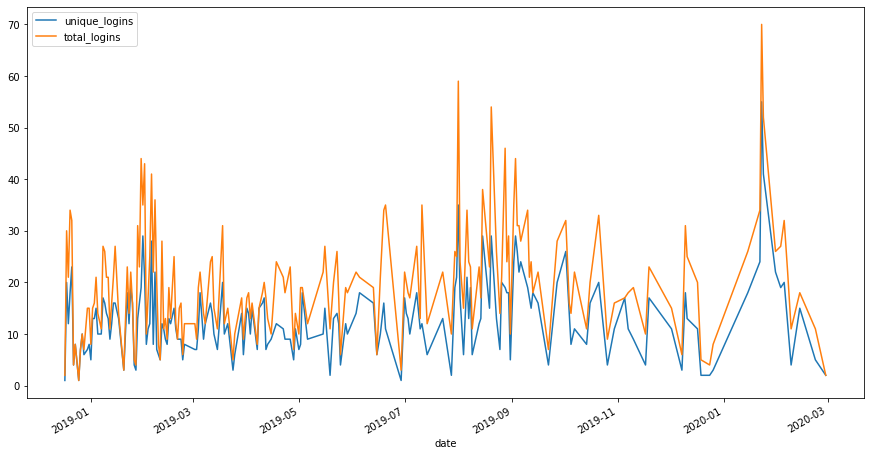

In [57]:
df_sesh.plot(figsize=[15,8])

In [47]:
df_edits = pd.read_csv(DATA_DIR + 'vmgr_edits.csv', names=['date_time', 'edit_type'])
df_edits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20332 entries, 0 to 20331
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  20332 non-null  object
 1   edit_type  20332 non-null  object
dtypes: object(2)
memory usage: 317.8+ KB


In [48]:
df_edits['date_time'] = pd.to_datetime(df_edits['date_time'])
df_edits['date'] = pd.to_datetime(df_edits.date_time.dt.date)
df_edits = df_edits.groupby(['date','edit_type']).count().reset_index()
df_edits.rename(columns={'date_time':'count'}, inplace=True)
df_edits.set_index('date', drop=True, inplace=True)
df_edits.head()

,edit_type,count
date,,
2018-12-18,cv,3
2018-12-18,field_data,34
2018-12-18,form_data,6
2018-12-18,pub_by_harvest,48
2018-12-18,pub_by_id,3


In [49]:
pub = 'publication'
other = 'other'
df_edits['edit_type'].replace({'pub_by_harvest': pub, 'pub_by_id': pub, 'pub_manual': pub,
                 'cv': other, 'field_data': other, 'form_data': other }, inplace=True)
df_edits.head()

,edit_type,count
date,,
2018-12-18,other,3
2018-12-18,other,34
2018-12-18,other,6
2018-12-18,publication,48
2018-12-18,publication,3


In [50]:
df_edits.set_index('edit_type', append=True, drop=True, inplace=True)
df_edits = df_edits.groupby(['date','edit_type']).sum().unstack()
df_edits.head()

count            
edit_type  other publication
date                        
2018-12-18  43.0        55.0
2018-12-19  39.0        24.0
2018-12-20  34.0       293.0
2018-12-21  31.0       254.0
2018-12-22   2.0         2.0

In [53]:
df_edits.columns = ['other_count', 'pub_count']
df_edits['total_edits'] = df_edits.other_count + df_edits.pub_count
df_edits.head()

,other_count,pub_count,total_edits
date,,,
2018-12-18,43.0,55.0,98.0
2018-12-19,39.0,24.0,63.0
2018-12-20,34.0,293.0,327.0
2018-12-21,31.0,254.0,285.0
2018-12-22,2.0,2.0,4.0


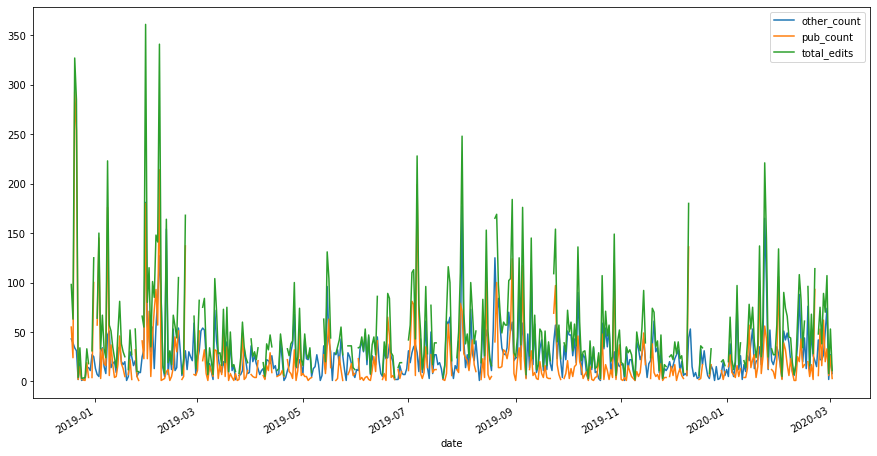

In [56]:
df_edits.plot(figsize=[15,8])